In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

df = pd.read_csv('medical_insurance.csv')

## 1. Exploratory Data Analysis

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


### Categorical Features

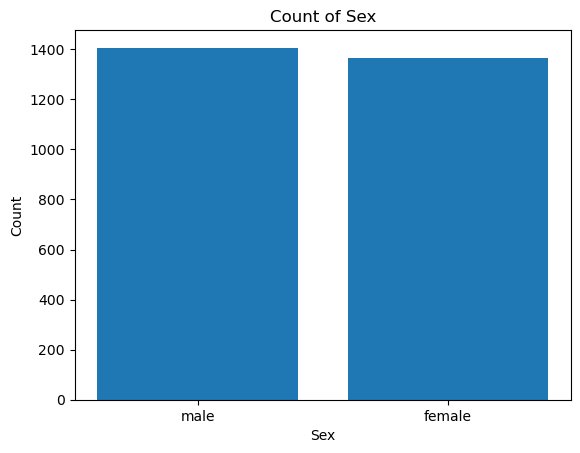

In [5]:
# Create a categorical bar plot for sex
sex_counts = df['sex'].value_counts()
plt.bar(sex_counts.index, sex_counts.values)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count of Sex')
plt.show()

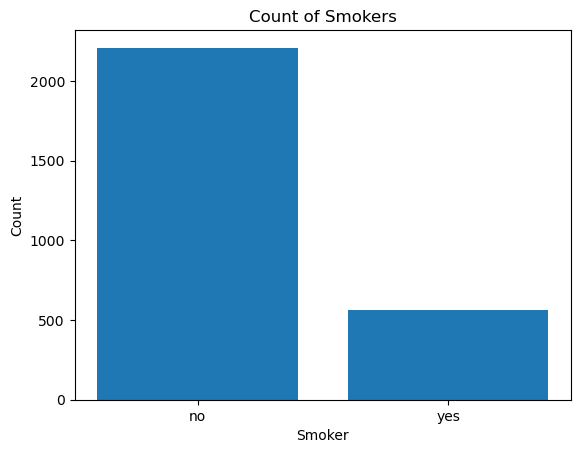

In [6]:
# Create a categorical bar plot for smokers
smoker_counts = df['smoker'].value_counts()
plt.bar(smoker_counts.index, smoker_counts.values)
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.title('Count of Smokers')
plt.show()

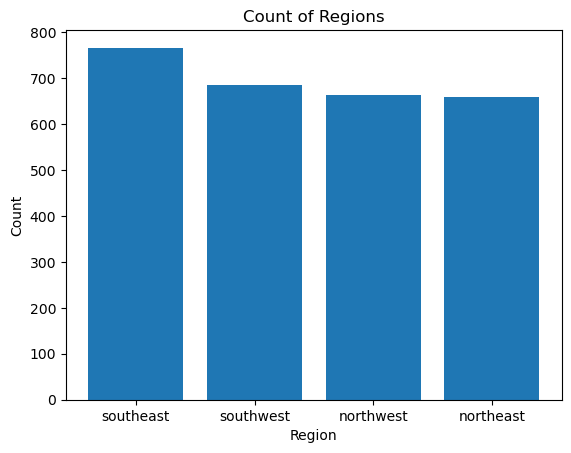

In [7]:
# Create a categorical bar plot for regions
regions_counts = df['region'].value_counts()
plt.bar(regions_counts.index, regions_counts.values)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Count of Regions')
plt.show()

## 2. Correlation Analysis

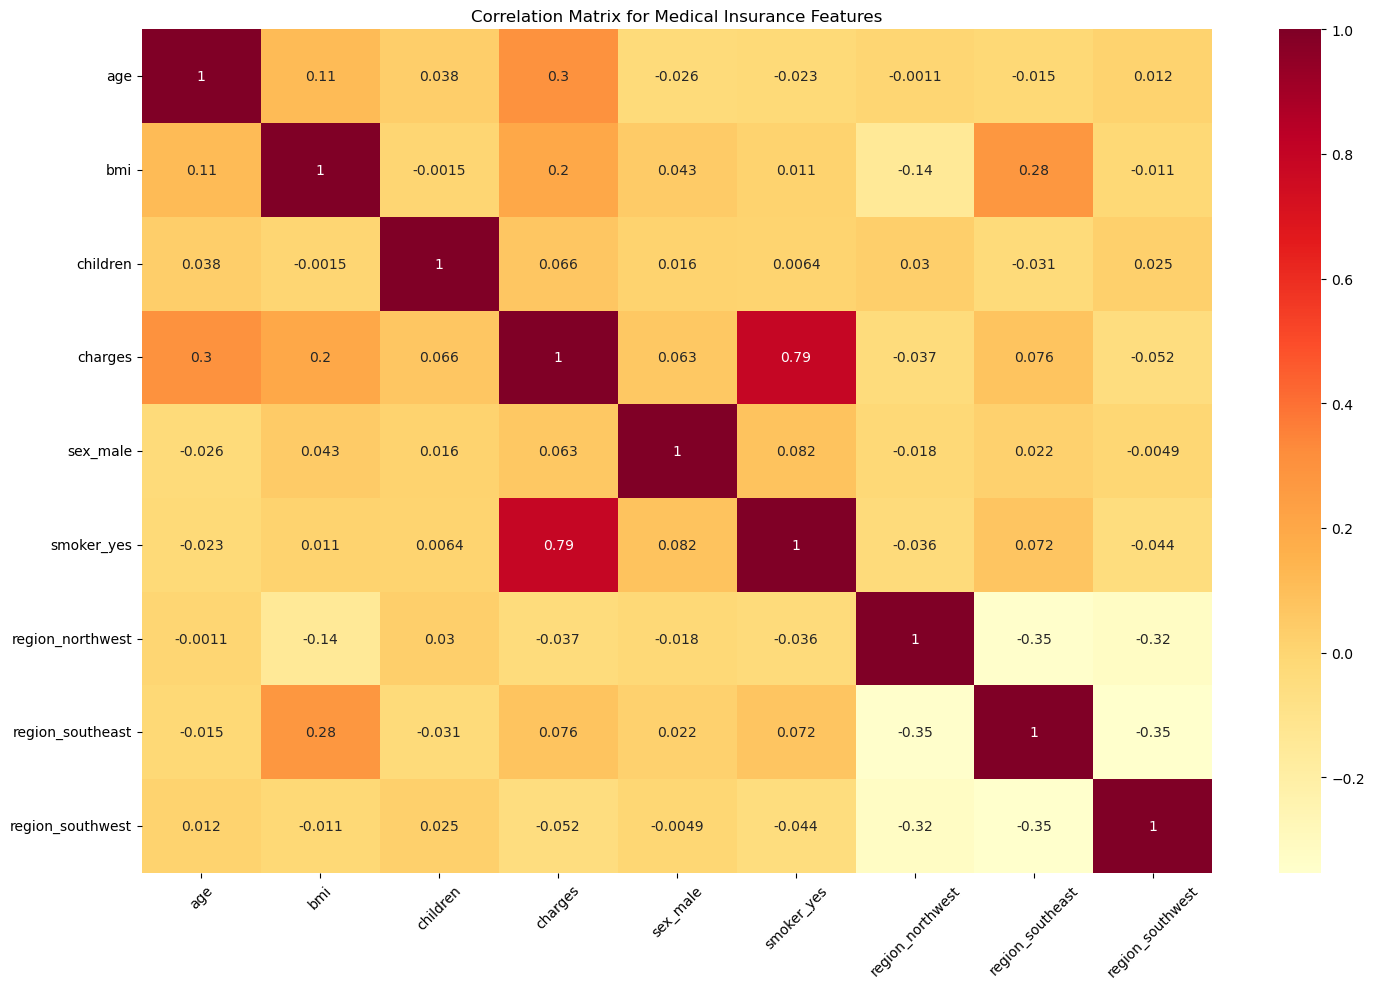

In [8]:
# Create binary representations for variables 
# It is easier for machine learning models to interpret for correlation analysis
df = pd.get_dummies(df, columns=["sex", "smoker", "region"], drop_first=True)

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlOrRd')
plt.xticks(rotation=45)
plt.title('Correlation Matrix for Medical Insurance Features')
plt.tight_layout()
plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               2772 non-null   int64  
 1   bmi               2772 non-null   float64
 2   children          2772 non-null   int64  
 3   charges           2772 non-null   float64
 4   sex_male          2772 non-null   uint8  
 5   smoker_yes        2772 non-null   uint8  
 6   region_northwest  2772 non-null   uint8  
 7   region_southeast  2772 non-null   uint8  
 8   region_southwest  2772 non-null   uint8  
dtypes: float64(2), int64(2), uint8(5)
memory usage: 100.3 KB


## 3. Random Forests Regression

In [10]:
X = df.drop('charges', axis=1)
y = df['charges']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111)

grid = {'n_estimators': [35, 40, 45, 50],
        'max_depth': [4, 6, 8, 10]}

rfr = RandomForestRegressor(random_state=111)
grid_search = GridSearchCV(estimator=rfr, param_grid=grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
print(f"Best Parameters: {best_params}")
print(f"Best Estimator: {best_estimator}")

Best Parameters: {'max_depth': 10, 'n_estimators': 35}
Best Estimator: RandomForestRegressor(max_depth=10, n_estimators=35, random_state=111)


In [11]:
rf = RandomForestRegressor(n_estimators=35, max_depth=10, random_state=111)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**(1/2)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 12193985.201963989
Root Mean Squared Error: 3491.9887173305683


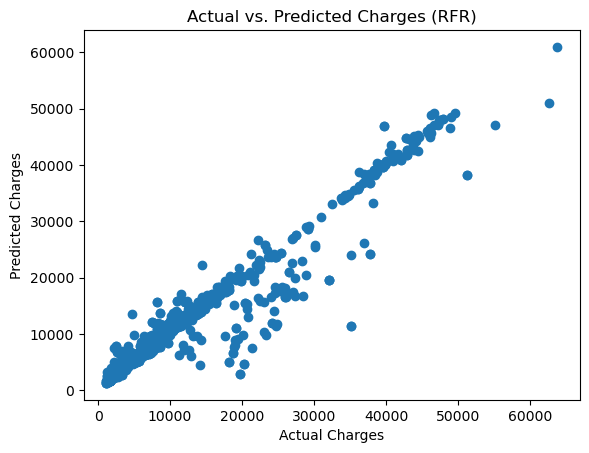

In [12]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Charges (RFR)")
plt.show()

In [13]:
# Model Validation 
num_folds = 5
scores = cross_val_score(rf, X, y, cv=num_folds, scoring='neg_mean_squared_error')
print(f"Negative Mean Squared Errors: {scores}")

mean_mse = -scores.mean()
std_mse = scores.std()
print(f"Mean MSE: {mean_mse}")
print(f"STD MSE: {std_mse}")

Negative Mean Squared Errors: [-8223799.00812857 -5045248.40549746 -6681821.64057512 -7750044.89953075
 -5533590.81893923]
Mean MSE: 6646900.954534224
STD MSE: 1225520.6105961825


## 3. Gradient Boosting Regression

In [14]:
X = df.drop('charges', axis=1)
y = df['charges']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111)

grid = {'n_estimators': [80, 85, 90, 95, 100], 
        'max_depth': [4, 6, 8, 10]}

gbr = GradientBoostingRegressor(random_state=111)
grid_search = GridSearchCV(estimator=gbr, param_grid=grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
print(f"Best Parameters: {best_params}")
print(f"Best Estimator: {best_estimator}")

Best Parameters: {'max_depth': 8, 'n_estimators': 95}
Best Estimator: GradientBoostingRegressor(max_depth=8, n_estimators=95, random_state=111)


In [15]:
gbr = GradientBoostingRegressor(n_estimators=95, max_depth=8, random_state=111)
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**(1/2)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 7869176.665326224
Root Mean Squared Error: 2805.205280425342


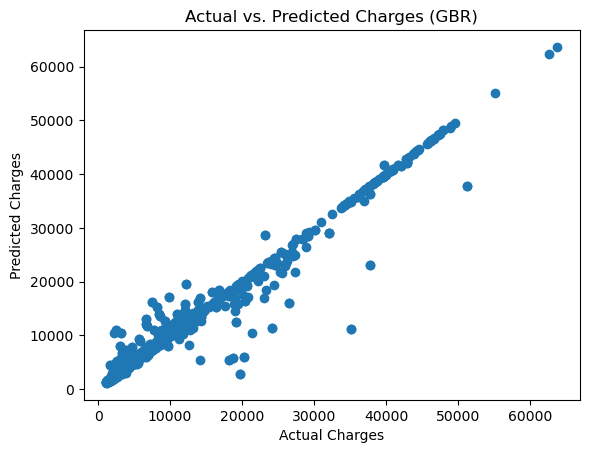

In [16]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Charges (GBR)")
plt.show()

In [17]:
# Model Validation 
num_folds = 5
scores = cross_val_score(gbr, X, y, cv=num_folds, scoring='neg_mean_squared_error')
print(f"Negative Mean Squared Errors: {scores}")

mean_mse = -scores.mean()
std_mse = scores.std()
print(f"Mean MSE: {mean_mse}")
print(f"STD MSE: {std_mse}")

Negative Mean Squared Errors: [-1494908.26776988  -769449.31348001 -1114298.32530434 -1522428.8467525
  -941653.64398049]
Mean MSE: 1168547.6794574435
STD MSE: 298478.3126649741
